## Exercise 3

### Gradient Descent
##### Implementing numerical gradient function, returns $\nabla{f(w^{k})}$

In [1]:
import numpy as np
from numpy import linalg as LA
from math import *

# f(w)
def function(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Evaluate gradient using partial derivative definition
def Gradient(vec):
    h = 0.00000000001
    xg = (function(vec[0] + h, vec[1]) - function(vec[0], vec[1])) / h
    yg = (function(vec[0], vec[1] + h) - function(vec[0], vec[1])) / h
    gradient = np.array([xg,yg])
    return gradient

##### Implementing gradient descent
Output $w^{*}$ when $\|\nabla{f(w^{*})}\|_{2} < 10^{-12}$. Failure declared if does not converge within 10,000 iterations.

In [2]:
# Euclidean norm of vector
def Norm(vec):
    return LA.norm(vec)

# Gradient Descent procedure: returns 2 lists w1path , w2path for the solution w*
def Descent(current_wk, step):
    w1path = []
    w2path = []
    max_iterations = 10000 # Maximum iterations
    epsilon = 10e-12 # Epsilon for convergence
    counter = 0 # Track iterations
    while (Norm(Gradient(current_wk)) > epsilon) and (counter < max_iterations):
        w1path.append(current_wk[0])
        w2path.append(current_wk[1])
        previous_wk = current_wk 
        current_wk = previous_wk - (step * Gradient(previous_wk))
        counter += 1
        
        
    print("Iteration",counter,"\tw* = ",current_wk, "\t2-Norm [Gradient(f(w))] =  ", Norm(Gradient(current_wk)))
    return w1path, w2path

##### 1. Gradient descent initialized at $w^{0}= [0\hspace{5mm}-4]^{T} $
$\bullet$ Step size $\gamma = 0.005$

In [3]:
# Initial point
current_wk = np.array([0,-4])

# Gamma step size
step = 0.005

# Run gradient descent
w1path, w2path = Descent(current_wk, step)

Iteration 88 	w* =  [-3.77931025 -3.28318599] 	2-Norm [Gradient(f(w))] =   7.2244728693608495e-12


$\bullet$ Repeating for step size $\gamma = 0.01$

In [4]:
current_wk = np.array([0,-4])
step = 0.01
w1path, w2path = Descent(current_wk, step)

Iteration 36 	w* =  [-3.77931025 -3.28318599] 	2-Norm [Gradient(f(w))] =   5.0814961141717254e-12


$\bullet$ There is a clear faster performance for step size $\gamma = 0.01$ (larger). There are two main concerns when choosing the step size: if the step size is small it can be computationally expensive, if large there is risk of overshooting the optimal solution. In both cases above, a fixed step size is used for convergence analysis which provides a decent opportunity to select the one that performs best.

##### 2. Gradient descent using step size $\gamma = 0.005$
###### $(i)$ $w^{0}= [0\hspace{5mm}-4]^{T} $ 

In [5]:
current_wk = np.array([0,-4])
step = 0.01
w1path1, w2path1 = Descent(current_wk, step)

Iteration 36 	w* =  [-3.77931025 -3.28318599] 	2-Norm [Gradient(f(w))] =   5.0814961141717254e-12


###### $(ii)$ $w^{0}= [0.5\hspace{5mm}-4]^{T} $

In [6]:
current_wk = np.array([0.5,-4])
step = 0.01
w1path2, w2path2 = Descent(current_wk, step)

Iteration 84 	w* =  [ 3.58442834 -1.84812653] 	2-Norm [Gradient(f(w))] =   8.788576520495723e-12


###### $(iii)$ $w^{0}= [0\hspace{5mm}4]^{T} $

In [7]:
current_wk = np.array([0,4])
step = 0.01
w1path3, w2path3 = Descent(current_wk, step)

Iteration 39 	w* =  [-2.80511809  3.13131252] 	2-Norm [Gradient(f(w))] =   7.906753129761173e-12


###### $(iv)$ $w^{0}= [0.5\hspace{5mm}4]^{T} $

In [8]:
current_wk = np.array([0.5,4])
step = 0.01
w1path4, w2path4 = Descent(current_wk, step)

Iteration 103 	w* =  [3. 2.] 	2-Norm [Gradient(f(w))] =   9.083314976367909e-12


$\bullet$ The solutions for $w^{*}$ in the four cases above are not equal. It is clear that since we are testing from different starting points at the same learning rate (less chance of overstepping) then the descent finds multiple global minima. Our descent approach should do a decent job of avoiding local minima, however it is possible that our function could not have one absolute global minima. After graphing this function below for visualization it, it makes sense that there could be multiple global minima.

$\bullet$ Contour plot of $f(w)$ over the region [-5, 5] $x$ [-5, 5], using 100 contour lines, with four gradient descents from previous part overlaid on top

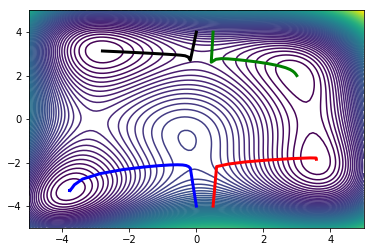

In [20]:
from matplotlib import pyplot as plt

# Vectorizing function
function_vector = np.vectorize(function)

x, y = np.meshgrid(np.linspace(-5, 5, 100),np.linspace(-5, 5, 100))

fig, ax = plt.subplots(1)
ax.contour(x, y, function_vector(x, y), 100)

# First solution path    
ax.plot(w1path1, w2path1, 'b', linewidth = 3.0)
# Second solution path
ax.plot(w1path2, w2path2, 'r', linewidth = 3.0)
# Third solution path
ax.plot(w1path3, w2path3, 'k', linewidth = 3.0)
# Fourth solution path
ax.plot(w1path4, w2path4, 'g', linewidth = 3.0)

plt.show()

### Parameter Estimation
##### 1. Generating N realizations of Gaussian random vector $X\in\mathbb{R}^{5}$ with mean vector $\mu = \mathbb{E}[X] = [-1\hspace{5mm}0\hspace{5mm}4\hspace{5mm}1\hspace{5mm}0.5]^{T}$ and covariance matrix $C = 2I$ where $I\in\mathbb{R}^{5x5}$. We are interested in values of N: $N = 10^{j}$, j = 1,...,6

In [10]:
from scipy.stats import multivariate_normal

# Realization of one random vector X
# X created using multivariate_normal.rvs with mean,covariance params
def RealizationofX():
    # Covariance matrix, C = 2I
    C = 2 * np.identity(5)
    # Mean vector E[X]
    mu = np.array([-1, 0, 4, 1, 0.5]).transpose()
    # Random vector X
    rv_x = multivariate_normal.rvs(mean = mu, cov = C, size = 1)
    # Return realization of random vector X
    return multivariate_normal.pdf(rv_x, mu, C)
    
# Returns list of N realizations of X
def Nrealizations(j):
    N = 10**j
    realizations = []
    for i in range(0,N):
        realizations.append(RealizationofX())
    return realizations

Function to return mean estimate using $\hat{\mu}$ = $\frac{1}{N}\sum_{n=1}^{N}x_{n}$ and function to return instantenous eror using $e_{N} = \|\hat{\mu}-\mu\|_{2}^{2}$ for $N = 10^{j}$

In [11]:
from numpy import linalg as LA

# Function to obtain estimate of mean vector for X
# First computes N realizations then takes mean
def EstimateMean(j):
    N = 10**j
    realizations = Nrealizations(j)
    estimated_mean = 1/N*(sum(realizations))
    return estimated_mean

# Function to compute instantenous error
def InstError(estimated_mean):
    mu = np.array([-1, 0, 4, 1, 0.5]).transpose() # Mean vector E[X]
    error = np.square(LA.norm(estimated_mean-mu))
    return error

$\bullet\hspace{5mm}j = 1: N = 10^{1}$, returning estimated mean and instantaneous error

In [12]:
j = 1
est_mean = EstimateMean(j)
error1 = InstError(est_mean)
print(est_mean, error1)

0.0002667237378996171 18.247599842066663


$\bullet\hspace{5mm}j = 2: N = 10^{2}$, returning estimated mean and instantaneous error

In [13]:
j = 2
est_mean = EstimateMean(j)
error2 = InstError(est_mean)
print(est_mean, error2)

0.00028793344348280385 18.24740901353699


$\bullet\hspace{5mm}j = 3: N = 10^{3}$, returning estimated mean and instantaneous error

In [14]:
j = 3
est_mean = EstimateMean(j)
error3 = InstError(est_mean)
print(est_mean, error3)

0.0003049737571135029 18.247255701230944


$\bullet\hspace{5mm}j = 4: N = 10^{4}$, returning estimated mean and instantaneous error

In [15]:
j = 4
est_mean = EstimateMean(j)
error4 = InstError(est_mean)
print(est_mean, error4)

0.00031101179555726994 18.247201377481666


$\bullet\hspace{5mm}j = 5: N = 10^{5}$, returning estimated mean and instantaneous error

In [16]:
j = 5
est_mean = EstimateMean(j)
error5 = InstError(est_mean)
print(est_mean, error5)

0.00031608838832807983 18.24715570406439


$\bullet\hspace{5mm}j = 6: N = 10^{6}$, returning estimated mean and instantaneous error

In [17]:
j = 6
est_mean = EstimateMean(j)
error6 = InstError(est_mean)
print(est_mean, error6)

0.00031551565685839677 18.247160856838924


$\bullet$ Log-log plot of $e_{N}$ as a function of N

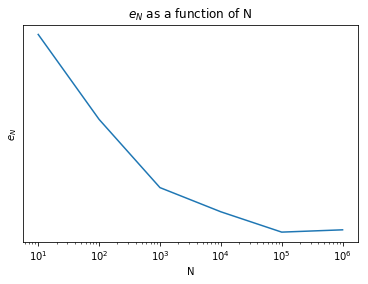

In [18]:
errors = [error1, error2, error3, error4, error5, error6]
N = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6]

fig, ax = plt.subplots()
ax.loglog(N, errors, basex=10, basey=10)
ax.set_title('$e_{N}$ as a function of N')
ax.set_xlabel('N')
ax.set_ylabel('$e_{N}$')
plt.show()

From the log-log plot above, we can see that the instantaneous errors decreases and eventually converges as N increases. The decrease is minimized as N approaches $10^{2}$ and converges closer to N = $10^{5}$